<a href="https://colab.research.google.com/github/Mbigdeli2003/Control_software_training/blob/main/ControlSoftware_Session_3_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

دیدن داده های iris

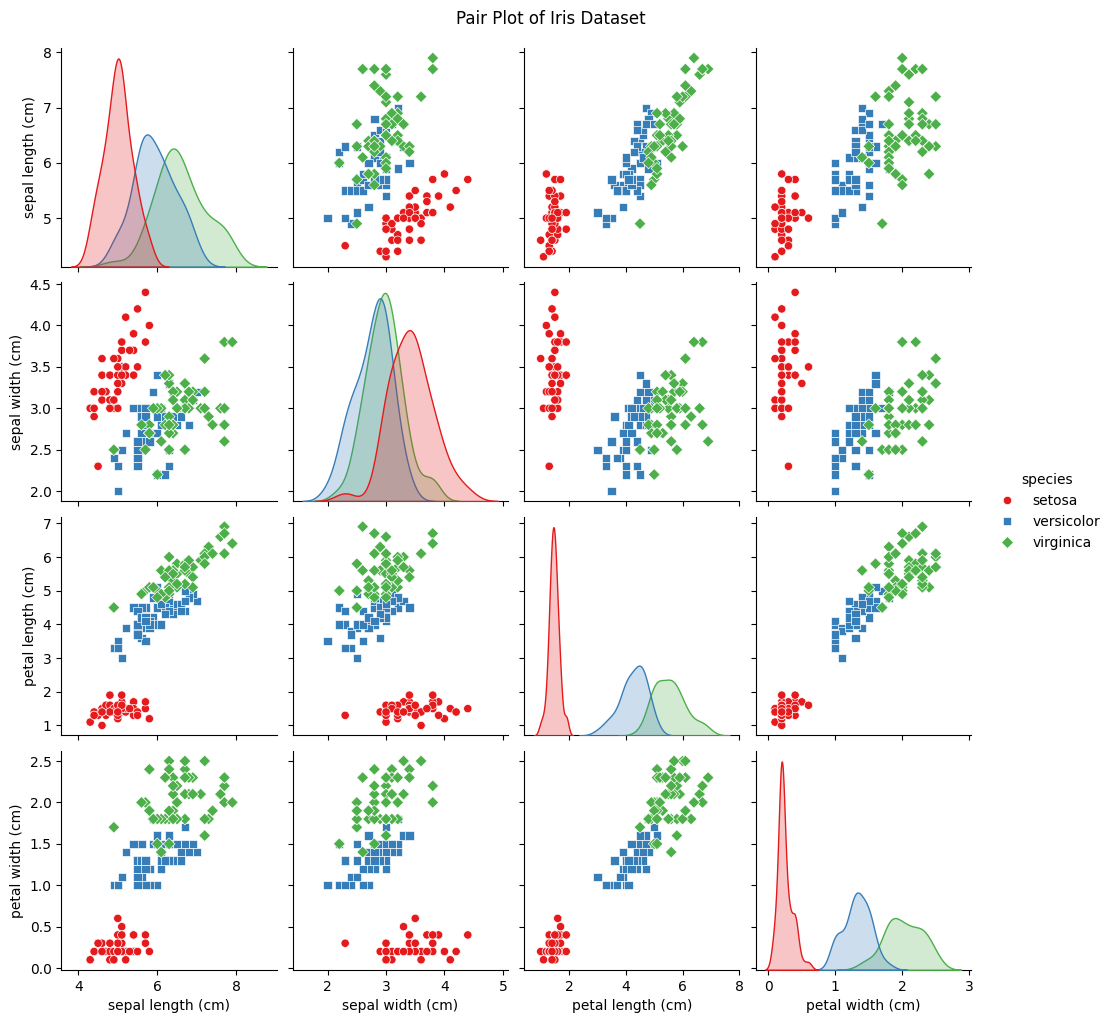

In [2]:
# Load the Iris dataset and convert it to a DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Pairplot to show the distribution of each class in terms of the features
sns.pairplot(iris_df, hue='species', palette='Set1', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()


#2 آماده‌سازی داده‌ها
از دیتاست Iris استفاده می‌کنیم و آن را به داده‌های آموزش و تست تقسیم می‌کنیم

In [3]:
# Loading the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#3 پیاده‌سازی فاصله اقلیدسی
برای محاسبه فاصله بین دو نقطه تعریف شده است. این فاصله به عنوان معیار نزدیکی بین نقاط استفاده می‌شود.

In [4]:
# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


#4
 الگوریتم KNN

محاسبه فاصله‌ها: فاصله هر نقطه تست با نقاط آموزشی محاسبه می‌شود.
انتخاب نزدیک‌ترین همسایه‌ها: نقاط با کمترین فاصله به تعداد
K انتخاب می‌شوند.
رای‌گیری: بر اساس فراوانی کلاس نزدیک‌ترین همسایه‌ها، کلاس پیش‌بینی‌شده مشخص می‌شود.

In [5]:
# KNN Algorithm
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        # Calculating distances between test_point and all training points
        distances = [euclidean_distance(test_point, x) for x in X_train]
        # Sorting distances and getting the nearest neighbors
        k_nearest_neighbors = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest_neighbors]
        # Majority vote to determine predicted class
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return predictions


#5
تست الگوریتم و محاسبه دقت
الگوریتم را با داده‌های تست اجرا می‌کنیم و سپس دقت آن را محاسبه می‌کنیم.
k=3
اجرا شده و سپس دقت مدل بر اساس تعداد پیش‌بینی‌های صحیح محاسبه می‌شود.

In [6]:
# Testing the KNN function
k = 3
y_pred = knn_predict(X_train, y_train, X_test, k)

# Calculating accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


#6
تفسیر خروجی و نمودار نتایج

این نمودار کلاس واقعی و پیش‌بینی‌شده را برای هر نمونه نشان می‌دهد. هر تفاوتی بین کلاس واقعی و پیش‌بینی‌شده می‌تواند نشان‌دهنده خطاهای مدل باشد.



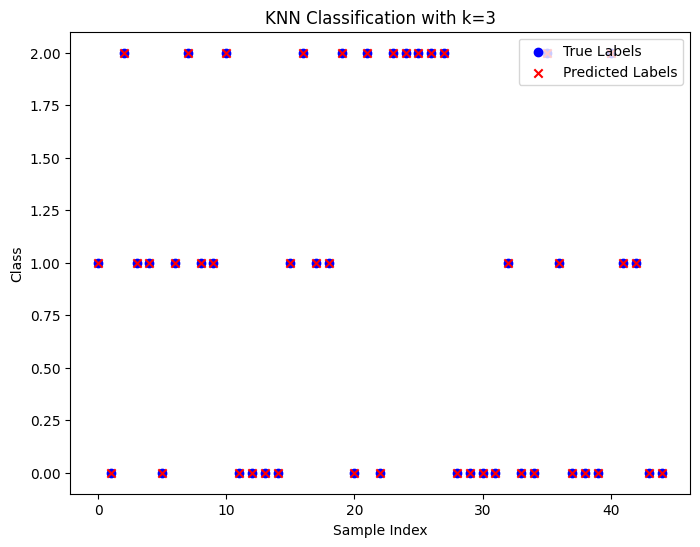

In [7]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels')
plt.scatter(range(len(y_pred)), y_pred, color='red', marker='x', label='Predicted Labels')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title(f'KNN Classification with k={k}')
plt.show()


#7
پیاده‌سازی KNN با scikit-learn

استفاده می‌شود تا مدل استاندارد KNN در sklearn تست شود و دقت آن با مدل دستی مقایسه شود.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k=3
# Using sklearn's KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# Accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn KNN Accuracy: {accuracy_sklearn * 100:.2f}%")


Sklearn KNN Accuracy: 100.00%


فسیر خروجی‌ها
دقت مدل دستی: دقت مدل دستی که با تابع knn_predict پیاده‌سازی شده محاسبه شده و نشان می‌دهد که چقدر نزدیک به مدل استاندارد sklearn است.
دقت مدل sklearn: مدل sklearn بهینه‌سازی‌شده و سریع‌تر است. مقایسه بین این دو

#8
محاسبه و رسم Confusion Matrix
از scikit-learn برای محاسبه و نمایش Confusion Matrix استفاده می‌کنیم. این کار را هم برای مدل دستی و هم برای مدل sklearn انجام می‌دهیم تا بتوانیم دقت هر دو مدل را در قالب Confusion Matrix مشاهده کنی

توضیح: در این کد:

ابتدا Confusion Matrix برای مدل دستی محاسبه و نمایش داده می‌شود. با ConfusionMatrixDisplay، ماتریس به صورت گرافیکی به نمایش درمی‌آید که کمک می‌کند تا هر کلاس و تعداد نمونه‌های درست و نادرست را به‌سادگی ببینیم.
سپس، همین مراحل برای مدل sklearn تکرار می‌شود تا امکان مقایسه بین مدل‌ها فراهم شود.
تفسیر Confusion Matrix
Confusion Matrix یک ماتریس مربعی است که شامل اطلاعات زیر می‌شود:

True Positive (TP): تعداد نمونه‌هایی که مدل به‌درستی در همان کلاس اصلی طبقه‌بندی کرده است.
False Positive (FP): تعداد نمونه‌هایی که مدل اشتباهی به کلاس دیگر اختصاص داده است (مثلاً نمونه‌ای از کلاس A به کلاس B پیش‌بینی شده است).
False Negative (FN): تعداد نمونه‌هایی که باید در یک کلاس مشخص قرار می‌گرفتند اما مدل آن‌ها را به‌درستی تشخیص نداده و در کلاس دیگری طبقه‌بندی کرده است.
True Negative (TN): تعداد نمونه‌هایی که در کلاس دیگری بوده‌اند و مدل آن‌ها را اشتباه به کلاس دیگر اختصاص نداده است.

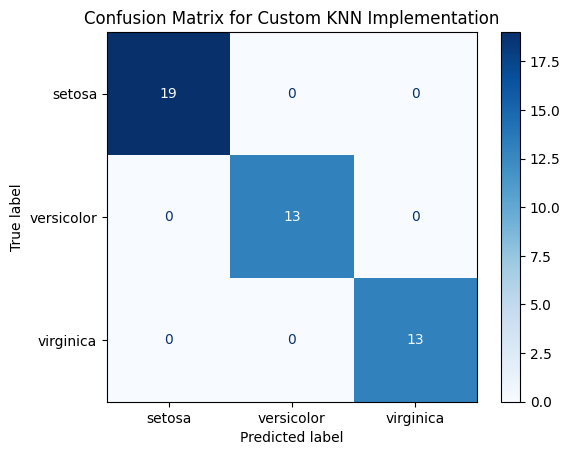

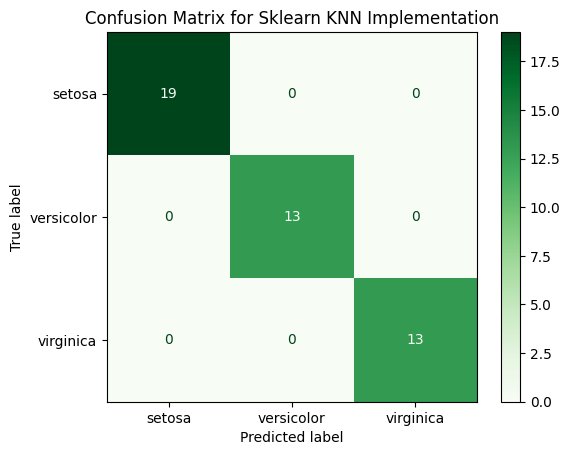

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for custom KNN implementation
conf_matrix_custom = confusion_matrix(y_test, y_pred)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_custom, display_labels=iris.target_names)
disp_custom.plot(cmap="Blues")
plt.title("Confusion Matrix for Custom KNN Implementation")
plt.show()

# Confusion Matrix for sklearn KNN
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sklearn, display_labels=iris.target_names)
disp_sklearn.plot(cmap="Greens")
plt.title("Confusion Matrix for Sklearn KNN Implementation")
plt.show()


#9
محاسبه معیارهای ارزیابی دیگر


Precision: دقت مدل در طبقه‌بندی هر کلاس خاص، یعنی درصد نمونه‌های صحیح طبقه‌بندی‌شده به تعداد کل نمونه‌های آن کلاس.
Recall: نسبت نمونه‌های صحیح طبقه‌بندی‌شده به تعداد کل نمونه‌هایی که باید در آن کلاس قرار می‌گرفتند.
F1-Score: میانگین هارمونیک Precision و Recall، که معیار متعادلی برای ارزیابی مدل به حساب می‌آید.
تفسیر خروجی
Confusion Matrix: این ماتریس به ما نشان می‌دهد مدل در طبقه‌بندی هر کلاس چقدر موفق بوده است. اگر تمام نمونه‌ها به‌درستی طبقه‌بندی شوند، عناصر غیرقطری ماتریس صفر خواهند بود.
Precision و Recall: اگر Precision و Recall هر دو بالا باشند، مدل هم در تشخیص درست و هم در طبقه‌بندی دقیق هر کلاس قوی عمل می‌کند. F1-Score بالا هم به این معنی است که مدل توانسته تعادل خوبی بین Precision و Recall برقرار کند.

In [10]:
from sklearn.metrics import classification_report

# Classification Report for Custom KNN
print("Classification Report for Custom KNN:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Classification Report for Sklearn KNN
print("Classification Report for Sklearn KNN:")
print(classification_report(y_test, y_pred_sklearn, target_names=iris.target_names))


Classification Report for Custom KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Classification Report for Sklearn KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

